## MLP in Classification

### Import the data

We import the data from the Central Folder.

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

import os

In [2]:
cwd = os.getcwd()
os.chdir('C:\\Users\\ekoulier\\Desktop\\GGD\\New Data\\Central_Folder\\Scripts')
from Functions_n_Data import month_data, create_lag, plot_class_freq, plot_horizontal_classes, make_classes
os.chdir(cwd)

In [3]:
data = create_lag(month_data, n_lags = 3)
data.head(n = 1)

,HVB,Date,WB,BZO,Trends,HVB-1,HVB-2,HVB-3,HVB+1,WB-1,WB-2,WB-3,WB+1,BZO-1,BZO-2,BZO-3,BZO+1,Trends-1,Trends-2,Trends-3
0,22,2004-04-01,8,44,47,43.0,26.0,29.0,41.0,5.0,12.0,3.0,18.0,23.0,11.0,20.0,39.0,57.0,0.0,0.0


### Create the distributions

We have to create the distributions and assign a label for the classes. First we compute the average number of patients per month and their standard deviation for the three GGD regions. The next step is to make a frequency histogram of incidences per month for every region. Finally, before plotting, we visualize the classes and the incidences on the same graph.

In [4]:
for ggd in ['HVB', 'WB', 'BZO']:
    print('{} monthly incidences: mean {:.2f} std {:.2f}'.format(ggd, np.mean(data[ggd]), np.std(data[ggd])))

HVB monthly incidences: mean 50.51 std 30.51
WB monthly incidences: mean 32.63 std 20.85
BZO monthly incidences: mean 27.88 std 18.96


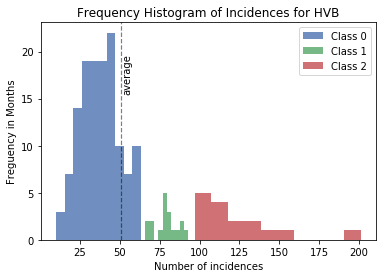

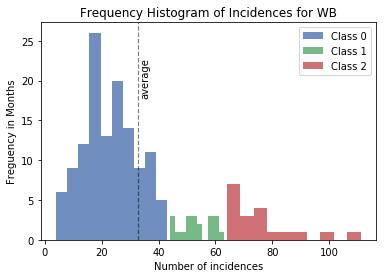

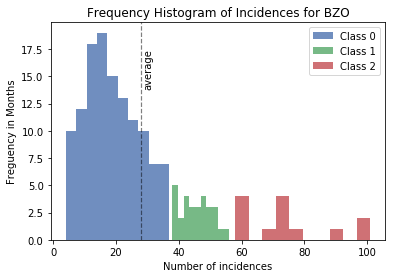

In [5]:
plot_class_freq(0.5, 1.5, data)

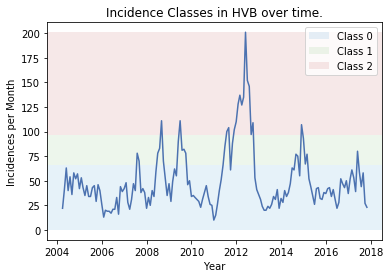

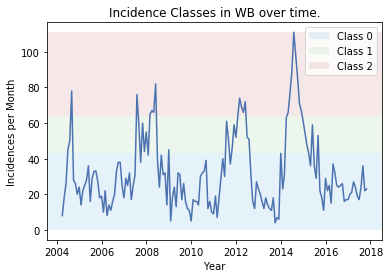

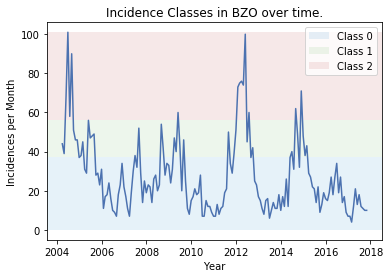

In [6]:
plot_horizontal_classes(0.5, 1.5, data)

## Preprocessing the Data

We have to create the labels for each month. For that reason we call function 'make_classes that assigns the appropriate classes to the GGD+1 columns.

In [7]:
cls_data = data.copy()
make_classes(0, 1.5, cls_data)
cls_data.head(n = 3)

,HVB,Date,WB,BZO,Trends,HVB-1,HVB-2,HVB-3,HVB+1,WB-1,WB-2,WB-3,WB+1,BZO-1,BZO-2,BZO-3,BZO+1,Trends-1,Trends-2,Trends-3
0,22,2004-04-01,8,44,47,43.0,26.0,29.0,0,5.0,12.0,3.0,0,23.0,11.0,20.0,1,57.0,0.0,0.0
1,41,2004-05-01,18,39,0,22.0,43.0,26.0,1,8.0,5.0,12.0,0,44.0,23.0,11.0,2,47.0,57.0,0.0
2,63,2004-06-01,26,68,39,41.0,22.0,43.0,0,18.0,8.0,5.0,1,39.0,44.0,23.0,2,0.0,47.0,57.0


In [8]:
cls_HVB = cls_data[['HVB+1',
                    'HVB', 'HVB-1', 'HVB-2', 'HVB-3',
                   'WB', 'WB-1', 'WB-2', 'WB-3',
                    'BZO', 'BZO-1', 'BZO-2', 'BZO-3',
                    'Trends', 'Trends-1', 'Trends-2', 'Trends-3'
                    ]]

HVB_dummy = pd.get_dummies(cls_HVB['HVB+1'])
cls_HVB = pd.concat([cls_HVB, HVB_dummy], axis = 1)

cls_WB = cls_data[['WB+1',
                   'HVB', 'HVB-1', 'HVB-2', 'HVB-3',
                   'WB', 'WB-1', 'WB-2', 'WB-3',
                    'BZO', 'BZO-1', 'BZO-2', 'BZO-3',
                    'Trends', 'Trends-1', 'Trends-2', 'Trends-3'
                    ]]

WB_dummy = pd.get_dummies(cls_WB['WB+1'])
cls_WB = pd.concat([cls_WB, WB_dummy], axis = 1)

cls_BZO = cls_data[['BZO+1',
                    'HVB', 'HVB-1', 'HVB-2', 'HVB-3',
                   'WB', 'WB-1', 'WB-2', 'WB-3',
                    'BZO', 'BZO-1', 'BZO-2', 'BZO-3',
                    'Trends', 'Trends-1', 'Trends-2', 'Trends-3'
                    ]]

BZO_dummy = pd.get_dummies(cls_BZO['BZO+1'])
cls_BZO = pd.concat([cls_BZO, BZO_dummy], axis = 1)

## Classification with Multi Layer Perceptron

We build several classification architectures to predict the class of the next month. <br/>
We also initialize the seed of numpy.

In [9]:
def plot_classes_against_predictions(pred_class, test_class):
    
    for pred, ggd in enumerate(['HVB', 'WB', 'BZO']):
        
        plt.scatter(range(len(pred_class)), pred_class[:, pred], label = 'predictions')
        plt.scatter(range(len(pred_class)),test_class[:, pred], label = 'test')
        plt.title('Class Predictions for '+ggd)
        plt.legend()
        plt.show()
        
#def plot_classes_predictions_one_region(pred_class, test_class):
    

In [10]:
from sklearn.model_selection import train_test_split

def split_data(X, y):

    X_T, X_test, y_T, y_test = train_test_split(X, y, test_size = 0.33, shuffle = False)
    X_train, X_val, y_train, y_val = train_test_split(X_T, y_T, test_size = 0.15, shuffle = True)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [11]:
def cl_model_1(X_train, y_train, X_val, y_val, X_test, y_test, n_epochs):
    
    model_1.add(Dense(X_train.shape[1] + 4, input_dim = X_train.shape[1]))
    model_1.add(Activation('sigmoid'))


    model_1.add(Dense(X_train.shape[1] ))
    model_1.add(Activation('sigmoid'))
    model_1.add(Dropout(0.2))



    # Final layer
    model_1.add(Dense(y_train.shape[1]))
    model_1.add(Activation('softmax'))

    # Print the parameters
    model_1.summary()
    
    H = model_1.compile(loss = 'categorical_crossentropy',  optimizer = 'rmsprop', metrics = ['accuracy'])
    H = model_1.fit(X_train, y_train, epochs =  n_epochs,  validation_data = (X_val, y_val))
    
    pred_1 = model_1.predict(X_test)
    np_y_test = np.array(y_test)
    

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.losses import categorical_crossentropy
from sklearn.metrics import recall_score

#seed = 42
#numpy.random.seed(seed)

In [ ]:
cls_HVB.head()

In [ ]:
cls_HVB.columns = [   'HVB+1',      'HVB',    'HVB-1',    'HVB-2',    'HVB-3',       'WB',
           'WB-1',     'WB-2',     'WB-3',      'BZO',    'BZO-1',    'BZO-2',
          'BZO-3',   'Trends', 'Trends-1', 'Trends-2', 'Trends-3',          '0',
                '1',          '2']

In [ ]:
X = cls_HVB[[ 'HVB', 'HVB-1', 'HVB-2', 'HVB-3',
                'WB', 'WB-1', 'WB-2', 'WB-3',
                'BZO', 'BZO-1', 'BZO-2', 'BZO-3',
                'Trends', 'Trends-1', 'Trends-2', 'Trends-3']]

y = cls_HVB[['0', '1', '2']]

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

### 1st Architecture

We begin with a shallow architecture.

In [ ]:
model_1 = Sequential()

# First Layer

model_1.add(Dense(X_train.shape[1] + 4, input_dim = X_train.shape[1]))
model_1.add(Activation('sigmoid'))


model_1.add(Dense(X_train.shape[1] ))
model_1.add(Activation('sigmoid'))
model_1.add(Dropout(0.2))
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      


# Final layer
model_1.add(Dense(y_train.shape[1]))
model_1.add(Activation('softmax'))

# Print the parameters
model_1.summary()

In [ ]:
H = model_1.compile(loss = 'categorical_crossentropy',  optimizer = 'rmsprop', metrics = ['accuracy'])
H = model_1.fit(X_train, y_train, epochs =  180,  validation_data = (X_val, y_val))

In [ ]:
pred_1 = model_1.predict(X_test)
np_y_test = np.array(y_test)

In [ ]:
np_y_test

In [ ]:
pred_1

In [ ]:
plt.plot(np_y_test)
plt.show()

In [ ]:
y_test = np_y_test.argmax(axis=1)
pred = pred_1.argmax( axis = 1)

In [ ]:
y_test

In [ ]:
plt.scatter(range(len(pred)), pred, label = 'Pred')
plt.scatter(range(len(y_test)), y_test, label = 'Test', marker="^")
plt.legend()
plt.title('Class Prediction in HvB')
plt.ylabel('Class')
plt.savefig('Class Pred in HvB', dpi = 800)
plt.show()